# Q2

In [61]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

read image "q2.png"

In [62]:
bgr_image = cv2.imread('./images/q2.png', cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

plot the image

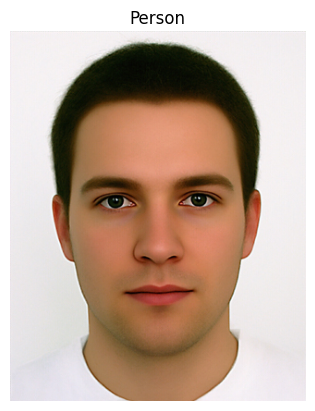

(400, 320, 3)


In [63]:
plt.imshow(rgb_image)
plt.title("Person")
plt.axis('off')
plt.show()
print(rgb_image.shape)

In [93]:
def region_growing(image, seed_point, threshold, neighbor_mode=0):
    # Create a copy of the input image to modify
    segmented_image = image.copy()

    # Define the neighborhood based on the neighbor_mode
    if neighbor_mode == 0:  # 4-connectivity
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    else:  # 8-connectivity
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

    # Get image dimensions
    height, width = image.shape[:2]

    # Create a list to store points in the region
    region_points = [seed_point]
    
    # Create a mask to keep track of visited pixels
    visited = np.zeros((height, width), dtype=bool)
    
    # Get the seed pixel value
    seed_value = image[seed_point[0], seed_point[1]]

    # Process points until the region stops growing
    while region_points:
        # Pop the last point from the list
        x, y = region_points.pop()

        # Mark the point as visited by coloring it red
        segmented_image[x, y] = [255, 0, 0]
        visited[x, y] = True

        # Check all neighbors of the current point
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            # Check if the neighbor is within the image bounds and unvisited
            if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                # Compute the distance between the neighbor pixel and the seed pixel
                neighbor_value = image[nx, ny]
                distance = np.linalg.norm(seed_value - neighbor_value)
                if distance < threshold:
                    # Add the neighbor to the region
                    region_points.append((nx, ny))
                    # Mark the neighbor as visited
                    # visited[nx, ny] = True

    return segmented_image


In [94]:
seed_point = (150, 150) 
threshold = 130

In [97]:
segmented_image_4 = region_growing(rgb_image.copy(), seed_point, threshold, 0)
segmented_image_8 = region_growing(rgb_image.copy(), seed_point, threshold, 1)

plot the results and compare them

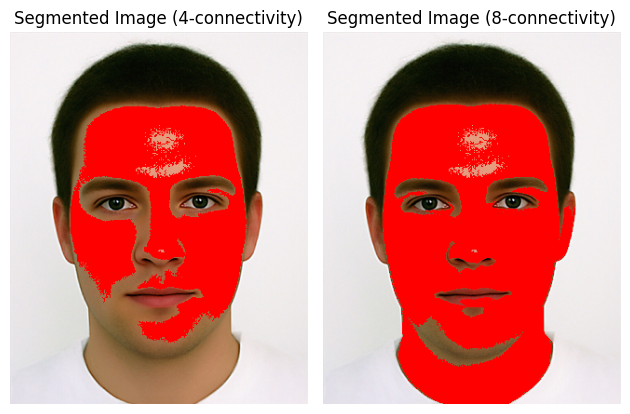

In [99]:
# Plot the segmented image with 4-connectivity
plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
# plt.imshow(gray)  # Convert BGR to RGB for proper display
segmented_image_4 = region_growing(rgb_image.copy(), seed_point, 95, 1)
plt.imshow(segmented_image_4, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('Segmented Image (4-connectivity)')
plt.axis('off')

# Plot the segmented image with 8-connectivity
plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
# plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
segmented_image_8 = region_growing(rgb_image.copy(), seed_point, threshold, 1)
plt.imshow(segmented_image_8, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('Segmented Image (8-connectivity)')
plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()